### Importing necessary libraries

In [1]:
from scipy.io import arff
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

import ecg_plot

import heartpy as hp

import sklearn.preprocessing as sk_preprocess

import sklearn.decomposition as sk_decomp

from sklearn.model_selection import train_test_split

from sklearn.linear_model import LogisticRegression

#from sklearn.preprocessing import MultiLabelBinarizer

### Read data

In [2]:
data = pd.DataFrame(arff.loadarff('ECG5000_TRAIN.arff')[0])

In [3]:
data_array=np.array(data)

In [4]:
data

,att1,att2,att3,att4,att5,att6,att7,att8,att9,att10,...,att132,att133,att134,att135,att136,att137,att138,att139,att140,target
0,-0.112522,-2.827204,-3.773897,-4.349751,-4.376041,-3.474986,-2.181408,-1.818286,-1.250522,-0.477492,...,0.792168,0.933541,0.796958,0.578621,0.257740,0.228077,0.123431,0.925286,0.193137,b'1'
1,-1.100878,-3.996840,-4.285843,-4.506579,-4.022377,-3.234368,-1.566126,-0.992258,-0.754680,0.042321,...,0.538356,0.656881,0.787490,0.724046,0.555784,0.476333,0.773820,1.119621,-1.436250,b'1'
2,-0.567088,-2.593450,-3.874230,-4.584095,-4.187449,-3.151462,-1.742940,-1.490659,-1.183580,-0.394229,...,0.886073,0.531452,0.311377,-0.021919,-0.713683,-0.532197,0.321097,0.904227,-0.421797,b'1'
3,0.490473,-1.914407,-3.616364,-4.318823,-4.268016,-3.881110,-2.993280,-1.671131,-1.333884,-0.965629,...,0.350816,0.499111,0.600345,0.842069,0.952074,0.990133,1.086798,1.403011,-0.383564,b'1'
4,0.800232,-0.874252,-2.384761,-3.973292,-4.338224,-3.802422,-2.534510,-1.783423,-1.594450,-0.753199,...,1.148884,0.958434,1.059025,1.371682,1.277392,0.960304,0.971020,1.614392,1.421456,b'1'
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
495,-0.478577,-1.779959,-2.398159,-3.170112,-3.559732,-3.573956,-2.989770,-2.270605,-1.688277,-1.359872,...,1.160885,1.456331,2.209421,2.507175,2.198534,1.705849,1.492642,1.561890,1.520161,b'4'
496,-1.325210,-2.480992,-2.965356,-3.342392,-3.176351,-2.891528,-2.369679,-1.598750,-1.071751,-0.891843,...,-0.172154,-0.864803,-1.549854,-2.460243,-3.366562,-3.466546,-2.718380,-1.855209,-1.539958,b'4'
497,-0.021964,-0.912434,-1.903353,-2.662829,-3.122156,-3.451490,-3.392982,-2.929937,-2.256294,-1.690706,...,1.339479,1.457995,2.128078,2.630759,2.295748,1.764967,1.444280,1.432347,1.457028,b'4'
498,0.288011,-1.098020,-2.500250,-3.598599,-3.650608,-3.281587,-2.231601,-1.250656,-1.072574,-0.434310,...,-0.029242,0.071414,0.118161,-0.071967,-0.171214,0.131211,0.049872,0.010915,-0.081534,b'5'


In [5]:
data['target']=data['target'].map(dict({b'1': 0, b'2': 1, b'3': 2, b'4': 3, b'5': 4}))

### Function to OneHotEncode the target labels

In [6]:
def oheColumn(oheData, columnName):
    oneHotEnc = sk_preprocess.OneHotEncoder(dtype=int, handle_unknown='ignore')

    oheDataColumn = oneHotEnc.fit_transform(oheData[[columnName]]).toarray()

    oheData[oneHotEnc.categories_[0]] = oheDataColumn

    for catCol in oneHotEnc.categories_[0]:
        oheData.rename(columns = {catCol:columnName+'_'+catCol}, inplace = True)
    
    return oheData

In [7]:
y = data['target']
X = data.drop('target', axis=1)

### Plot the ECG data

C:\Users\vivek\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:3432: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
C:\Users\vivek\anaconda3\lib\site-packages\numpy\core\_methods.py:265: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
C:\Users\vivek\anaconda3\lib\site-packages\numpy\ma\core.py:5288: RuntimeWarning: Mean of empty slice.
  result = super().mean(axis=axis, dtype=dtype, **kwargs)[()]
C:\Users\vivek\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:3715: RuntimeWarning: Degrees of freedom <= 0 for slice
  return _methods._var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
C:\Users\vivek\anaconda3\lib\site-packages\heartpy\visualizeutils.py:119: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


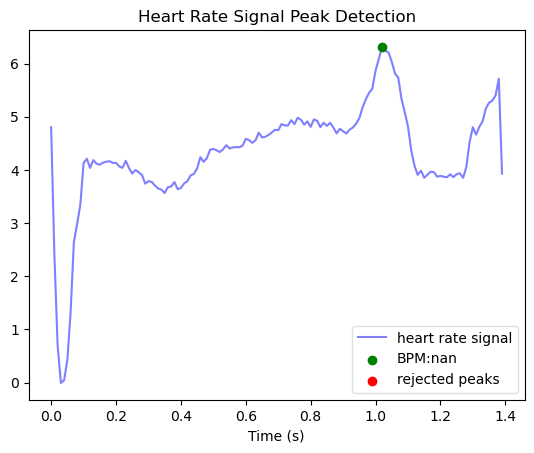

In [8]:
working_data, measures = hp.process(np.delete(data_array[3], -1), 100.0)
hp.plotter(working_data, measures)

### Correlation of features

In [9]:
data_corr=data.corr()

In [10]:
correlated_features=data_corr[(data_corr > 0.3) | (data_corr < -0.3)].stack().index
correlated_features_df=pd.DataFrame(correlated_features)
correlated_features_df=pd.DataFrame(correlated_features_df[0].tolist(),index=correlated_features_df.index)
correlated_features_df=correlated_features_df[correlated_features_df.loc[:,0] != correlated_features_df.loc[:,1]]

In [11]:
correlated_features_df

,0,1
1,att1,att2
2,att1,att3
3,att1,att4
4,att1,att96
5,att1,att97
...,...,...
9603,target,att135
9604,target,att136
9605,target,att137
9606,target,att138


The features are highly correlated as seen this result. It shows the correlations where **|correlation between features|>0.3**.

### Split data into test and train data

In [12]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)

### Standardizing features to reduce bias

In [13]:
def standardize(data):
    sc = sk_preprocess.StandardScaler()
    return sc.fit_transform(data)
 
X_train_sc_processed = standardize(X_train)
X_test_sc_processed = standardize(X_test)

### Applying PCA

In [14]:
pca = sk_decomp.PCA(n_components=30)

def pcaFitData(data):
    return pca.fit_transform(data)
    
def pcaTransformData(data):
    return pca.transform(data)

def pcaRetrieveVariance():
    return pca.explained_variance_ratio_

In [15]:
X_train_processed = pcaFitData(X_train_sc_processed)
X_test_processed = pcaTransformData(X_test_sc_processed)
 
explained_variance = pcaRetrieveVariance()

### Performing Logistic regression for Multiclass classification

In [22]:
logisticRegModel = LogisticRegression()

def logisticFit(X, y):
    return logisticRegModel.fit(X, y)

logisticRegModel_trained = logisticFit(X_train_processed, y_train)

C:\Users\vivek\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


C:\Users\vivek\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:700: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=10.
  warnings.warn(
C:\Users\vivek\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:700: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=10.
  warnings.warn(
C:\Users\vivek\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:700: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=10.
  warnings.warn(
C:\Users\vivek\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:700: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=10.
  warnings.warn(
C:\Users\vivek\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:700: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=10.
  warnings.warn(
C:\Users\vivek\anaconda3\

>Name:20 	Mean:0.891 (Scores:0.050)
>Name:21 	Mean:0.889 (Scores:0.053)


C:\Users\vivek\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:700: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=10.
  warnings.warn(
C:\Users\vivek\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:700: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=10.
  warnings.warn(
C:\Users\vivek\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:700: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=10.
  warnings.warn(
C:\Users\vivek\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:700: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=10.
  warnings.warn(
C:\Users\vivek\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:700: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=10.
  warnings.warn(
C:\Users\vivek\anaconda3\

>Name:22 	Mean:0.904 (Scores:0.051)
>Name:23 	Mean:0.904 (Scores:0.056)


C:\Users\vivek\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:700: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=10.
  warnings.warn(
C:\Users\vivek\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:700: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=10.
  warnings.warn(
C:\Users\vivek\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:700: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=10.
  warnings.warn(
C:\Users\vivek\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:700: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=10.
  warnings.warn(
C:\Users\vivek\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:700: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=10.
  warnings.warn(
C:\Users\vivek\anaconda3\

>Name:24 	Mean:0.893 (Scores:0.050)
>Name:25 	Mean:0.896 (Scores:0.051)


C:\Users\vivek\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:700: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=10.
  warnings.warn(
C:\Users\vivek\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:700: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=10.
  warnings.warn(
C:\Users\vivek\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:700: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=10.
  warnings.warn(
C:\Users\vivek\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:700: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=10.
  warnings.warn(
C:\Users\vivek\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:700: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=10.
  warnings.warn(
C:\Users\vivek\anaconda3\

>Name:26 	Mean:0.900 (Scores:0.048)
>Name:27 	Mean:0.896 (Scores:0.048)


C:\Users\vivek\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:700: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=10.
  warnings.warn(
C:\Users\vivek\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:700: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=10.
  warnings.warn(
C:\Users\vivek\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:700: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=10.
  warnings.warn(
C:\Users\vivek\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:700: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=10.
  warnings.warn(
C:\Users\vivek\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:700: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=10.
  warnings.warn(
C:\Users\vivek\anaconda3\

>Name:28 	Mean:0.898 (Scores:0.051)
>Name:29 	Mean:0.898 (Scores:0.051)


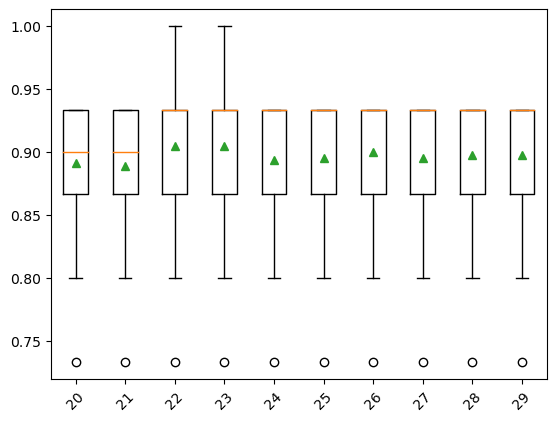

In [29]:
# compare pca number of components with logistic regression algorithm for classification
from numpy import mean
from numpy import std
from sklearn.datasets import make_classification
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.pipeline import Pipeline
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
from matplotlib import pyplot

# get a list of models to evaluate
def get_models(X):
    models = dict()
    for i in range(20,min(50, X.shape[1])):
        steps = [('pca', PCA(n_components=i)), ('m', LogisticRegression())]
        models[str(i)] = Pipeline(steps=steps)
    return models

# evaluate a given model using cross-validation
def evaluate_model(model, X, y):
    cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
    scores = cross_val_score(model, X, y, scoring='accuracy', cv=cv, n_jobs=-1, error_score='raise')
    return scores

# #get data
# y = data['target']
# X = data.drop('target', axis=1)
#print(X,y)

def evaluatePCA(X, y):
    # get the models to evaluate
    models = get_models(X)
    # evaluate the models and store results
    results, names = list(), list()
    for name, model in models.items():
        scores = evaluate_model(model, X, y)
        results.append(scores)
        names.append(name)
        print('>Name:%s \tMean:%.3f (Scores:%.3f)' % (name, mean(scores), std(scores)))
    # plot model performance for comparison
    pyplot.boxplot(results, labels=names, showmeans=True)
    pyplot.xticks(rotation=45)
    pyplot.show()
    
evaluatePCA(X_test_processed, y_test)

### Shuffling columns and applying PCA

In [30]:
X_test_shuffled = X_test[np.random.default_rng(seed=42).permutation(X_test.columns.values)]

C:\Users\vivek\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:700: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=10.
  warnings.warn(
C:\Users\vivek\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:700: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=10.
  warnings.warn(
C:\Users\vivek\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:700: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=10.
  warnings.warn(


>Name:20 	Mean:0.904 (Scores:0.051)


C:\Users\vivek\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:700: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=10.
  warnings.warn(
C:\Users\vivek\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:700: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=10.
  warnings.warn(
C:\Users\vivek\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:700: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=10.
  warnings.warn(


>Name:21 	Mean:0.900 (Scores:0.048)
>Name:22 	Mean:0.900 (Scores:0.048)


C:\Users\vivek\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:700: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=10.
  warnings.warn(
C:\Users\vivek\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:700: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=10.
  warnings.warn(
C:\Users\vivek\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:700: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=10.
  warnings.warn(
C:\Users\vivek\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:700: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=10.
  warnings.warn(
C:\Users\vivek\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:700: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=10.
  warnings.warn(
C:\Users\vivek\anaconda3\

>Name:23 	Mean:0.900 (Scores:0.048)
>Name:24 	Mean:0.902 (Scores:0.048)


C:\Users\vivek\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:700: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=10.
  warnings.warn(
C:\Users\vivek\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:700: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=10.
  warnings.warn(
C:\Users\vivek\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:700: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=10.
  warnings.warn(
C:\Users\vivek\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:700: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=10.
  warnings.warn(
C:\Users\vivek\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:700: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=10.
  warnings.warn(
C:\Users\vivek\anaconda3\

>Name:25 	Mean:0.902 (Scores:0.048)
>Name:26 	Mean:0.904 (Scores:0.051)


C:\Users\vivek\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:700: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=10.
  warnings.warn(
C:\Users\vivek\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:700: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=10.
  warnings.warn(
C:\Users\vivek\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:700: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=10.
  warnings.warn(


>Name:27 	Mean:0.902 (Scores:0.048)


C:\Users\vivek\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:700: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=10.
  warnings.warn(
C:\Users\vivek\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:700: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=10.
  warnings.warn(
C:\Users\vivek\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:700: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=10.
  warnings.warn(


>Name:28 	Mean:0.902 (Scores:0.048)


C:\Users\vivek\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:700: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=10.
  warnings.warn(
C:\Users\vivek\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:700: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=10.
  warnings.warn(
C:\Users\vivek\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:700: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=10.
  warnings.warn(


>Name:29 	Mean:0.904 (Scores:0.051)


C:\Users\vivek\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:700: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=10.
  warnings.warn(
C:\Users\vivek\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:700: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=10.
  warnings.warn(
C:\Users\vivek\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:700: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=10.
  warnings.warn(


>Name:30 	Mean:0.904 (Scores:0.051)


C:\Users\vivek\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:700: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=10.
  warnings.warn(
C:\Users\vivek\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:700: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=10.
  warnings.warn(
C:\Users\vivek\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:700: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=10.
  warnings.warn(


>Name:31 	Mean:0.904 (Scores:0.051)


C:\Users\vivek\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:700: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=10.
  warnings.warn(
C:\Users\vivek\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:700: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=10.
  warnings.warn(
C:\Users\vivek\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:700: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=10.
  warnings.warn(


>Name:32 	Mean:0.902 (Scores:0.051)


C:\Users\vivek\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:700: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=10.
  warnings.warn(
C:\Users\vivek\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:700: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=10.
  warnings.warn(
C:\Users\vivek\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:700: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=10.
  warnings.warn(


>Name:33 	Mean:0.902 (Scores:0.051)


C:\Users\vivek\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:700: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=10.
  warnings.warn(
C:\Users\vivek\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:700: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=10.
  warnings.warn(
C:\Users\vivek\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:700: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=10.
  warnings.warn(


>Name:34 	Mean:0.900 (Scores:0.054)


C:\Users\vivek\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:700: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=10.
  warnings.warn(
C:\Users\vivek\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:700: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=10.
  warnings.warn(
C:\Users\vivek\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:700: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=10.
  warnings.warn(


>Name:35 	Mean:0.900 (Scores:0.051)


C:\Users\vivek\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:700: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=10.
  warnings.warn(
C:\Users\vivek\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:700: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=10.
  warnings.warn(
C:\Users\vivek\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:700: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=10.
  warnings.warn(


>Name:36 	Mean:0.904 (Scores:0.054)


C:\Users\vivek\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:700: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=10.
  warnings.warn(
C:\Users\vivek\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:700: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=10.
  warnings.warn(
C:\Users\vivek\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:700: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=10.
  warnings.warn(


>Name:37 	Mean:0.907 (Scores:0.050)


C:\Users\vivek\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:700: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=10.
  warnings.warn(
C:\Users\vivek\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:700: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=10.
  warnings.warn(
C:\Users\vivek\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:700: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=10.
  warnings.warn(


>Name:38 	Mean:0.904 (Scores:0.051)


C:\Users\vivek\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:700: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=10.
  warnings.warn(
C:\Users\vivek\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:700: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=10.
  warnings.warn(
C:\Users\vivek\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:700: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=10.
  warnings.warn(


>Name:39 	Mean:0.907 (Scores:0.050)


C:\Users\vivek\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:700: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=10.
  warnings.warn(
C:\Users\vivek\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:700: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=10.
  warnings.warn(
C:\Users\vivek\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:700: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=10.
  warnings.warn(


>Name:40 	Mean:0.907 (Scores:0.050)


C:\Users\vivek\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:700: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=10.
  warnings.warn(
C:\Users\vivek\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:700: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=10.
  warnings.warn(
C:\Users\vivek\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:700: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=10.
  warnings.warn(


>Name:41 	Mean:0.907 (Scores:0.050)


C:\Users\vivek\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:700: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=10.
  warnings.warn(
C:\Users\vivek\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:700: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=10.
  warnings.warn(
C:\Users\vivek\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:700: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=10.
  warnings.warn(


>Name:42 	Mean:0.907 (Scores:0.050)


C:\Users\vivek\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:700: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=10.
  warnings.warn(
C:\Users\vivek\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:700: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=10.
  warnings.warn(
C:\Users\vivek\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:700: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=10.
  warnings.warn(


>Name:43 	Mean:0.907 (Scores:0.050)


C:\Users\vivek\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:700: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=10.
  warnings.warn(
C:\Users\vivek\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:700: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=10.
  warnings.warn(
C:\Users\vivek\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:700: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=10.
  warnings.warn(


>Name:44 	Mean:0.907 (Scores:0.050)


C:\Users\vivek\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:700: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=10.
  warnings.warn(
C:\Users\vivek\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:700: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=10.
  warnings.warn(
C:\Users\vivek\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:700: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=10.
  warnings.warn(


>Name:45 	Mean:0.907 (Scores:0.050)


C:\Users\vivek\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:700: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=10.
  warnings.warn(
C:\Users\vivek\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:700: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=10.
  warnings.warn(
C:\Users\vivek\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:700: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=10.
  warnings.warn(


>Name:46 	Mean:0.907 (Scores:0.050)


C:\Users\vivek\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:700: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=10.
  warnings.warn(
C:\Users\vivek\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:700: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=10.
  warnings.warn(
C:\Users\vivek\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:700: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=10.
  warnings.warn(


>Name:47 	Mean:0.907 (Scores:0.050)


C:\Users\vivek\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:700: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=10.
  warnings.warn(
C:\Users\vivek\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:700: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=10.
  warnings.warn(
C:\Users\vivek\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:700: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=10.
  warnings.warn(


>Name:48 	Mean:0.907 (Scores:0.050)


C:\Users\vivek\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:700: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=10.
  warnings.warn(
C:\Users\vivek\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:700: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=10.
  warnings.warn(
C:\Users\vivek\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:700: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=10.
  warnings.warn(


>Name:49 	Mean:0.907 (Scores:0.050)


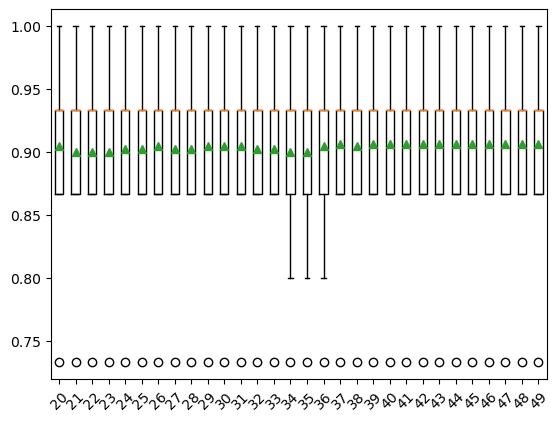

In [31]:
evaluatePCA(X_test_shuffled, y_test)

As seen in the above plot, the data with shuffled columns also yields similar accuracy scores as PCA doesn't consider the order (order matters here as the data is a time series) which is flawed for this particular dataset.<br><br>
So, we need to consider the bias of a column towards it's previous columns.

## Alternative approaches to consider time series

### 1. Using RNN

In [25]:
from keras.models import Sequential
import keras.layers as kerasLayers
import keras

In [18]:
model = Sequential()

#### 4 Layers of LSTM to understand short term dependencies and further layers for the long term dependencies

In [19]:
model.add(kerasLayers.LSTM(units = 50, return_sequences = True, input_shape = (X_train.shape[1], 1)))
model.add(kerasLayers.Dropout(0.2))

model.add(kerasLayers.LSTM(units = 50, return_sequences = True))
model.add(kerasLayers.Dropout(0.2))

model.add(kerasLayers.LSTM(units = 50, return_sequences = True))
model.add(kerasLayers.Dropout(0.2))

model.add(kerasLayers.LSTM(units = 50))
model.add(kerasLayers.Dropout(0.2))

model.add(kerasLayers.Dense(units = 5, activation='softmax'))

model.compile(optimizer = 'adam', loss = 'sparse_categorical_crossentropy')

model.fit(X_train, y_train, epochs = 100, batch_size = 32)

Epoch 1/100
11/11 [==============================] - 16s 350ms/step - loss: 1.3366
Epoch 2/100
11/11 [==============================] - 4s 359ms/step - loss: 0.7248
Epoch 3/100
11/11 [==============================] - 3s 307ms/step - loss: 0.4140
Epoch 4/100
11/11 [==============================] - 3s 299ms/step - loss: 0.2927
Epoch 5/100
11/11 [==============================] - 3s 305ms/step - loss: 0.2588
Epoch 6/100
11/11 [==============================] - 3s 292ms/step - loss: 0.2346
Epoch 7/100
11/11 [==============================] - 3s 285ms/step - loss: 0.2236
Epoch 8/100
11/11 [==============================] - 3s 300ms/step - loss: 0.2030
Epoch 9/100
11/11 [==============================] - 3s 306ms/step - loss: 0.2104
Epoch 10/100
11/11 [==============================] - 3s 296ms/step - loss: 0.2124
Epoch 11/100
11/11 [==============================] - 3s 286ms/step - loss: 0.2060
Epoch 12/100
11/11 [==============================] - 3s 291ms/step - loss: 0.1928
Epoch 13/100

11/11 [==============================] - 4s 336ms/step - loss: 0.0646
Epoch 100/100
11/11 [==============================] - 4s 353ms/step - loss: 0.0661


In [35]:
y_predicted = model.predict(X_test)

5/5 [==============================] - 0s 90ms/step


In [36]:
y_predicted#, y_test.unique()

array([[8.91795135e-05, 9.80499685e-01, 6.17701618e-04, 1.86023246e-02,
        1.91135827e-04],
       [9.99913216e-01, 2.58677319e-05, 8.55570852e-06, 2.21859773e-05,
        3.02012268e-05],
       [1.06361113e-04, 9.79838967e-01, 8.04320676e-04, 1.90387834e-02,
        2.11544495e-04],
       [9.99879122e-01, 3.97130098e-05, 8.64492904e-06, 2.81082594e-05,
        4.42974015e-05],
       [9.99854207e-01, 2.61623736e-05, 2.01048333e-05, 4.53104876e-05,
        5.40819965e-05],
       [9.16901845e-05, 9.77290690e-01, 8.49278760e-04, 2.15595998e-02,
        2.08642407e-04],
       [8.98168291e-05, 9.80675399e-01, 6.24257955e-04, 1.84144787e-02,
        1.95998655e-04],
       [9.99768436e-01, 5.32544000e-05, 2.74965932e-05, 1.18523152e-04,
        3.22794876e-05],
       [9.99902129e-01, 2.40841055e-05, 8.62780689e-06, 2.76057981e-05,
        3.75281270e-05],
       [8.99512816e-05, 9.80503798e-01, 6.47644571e-04, 1.85665302e-02,
        1.92210166e-04],
       [9.97935414e-01, 6.3698

In [37]:
y_predicted = np.argmax(y_predicted, axis=1)

array([1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 3, 1, 1, 3, 1, 3,
       0, 1, 0, 1, 3, 0, 0, 1, 2, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0,
       1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 3, 0, 1, 0, 0, 1,
       1, 0, 1, 2, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0,
       0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0,
       2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 1], dtype=int64)

In [38]:
# Calculate accuracy
accuracy = np.mean(y_predicted == y_test)

# Calculate true positives, false positives, true negatives, false negatives
tp = np.sum((y_predicted == 1) & (y_test == 1))
fp = np.sum((y_predicted == 1) & (y_test == 0))
tn = np.sum((y_predicted == 0) & (y_test == 0))
fn = np.sum((y_predicted == 0) & (y_test == 1))

# Calculate precision
precision = tp / (tp + fp)

# Calculate recall
recall = tp / (tp + fn)

# Calculate F1-score
f1_score = 2 * (precision * recall) / (precision + recall)

# Print the calculated metrics
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1-score:", f1_score)


Accuracy: 0.9466666666666667
Precision: 0.98
Recall: 1.0
F1-score: 0.98989898989899


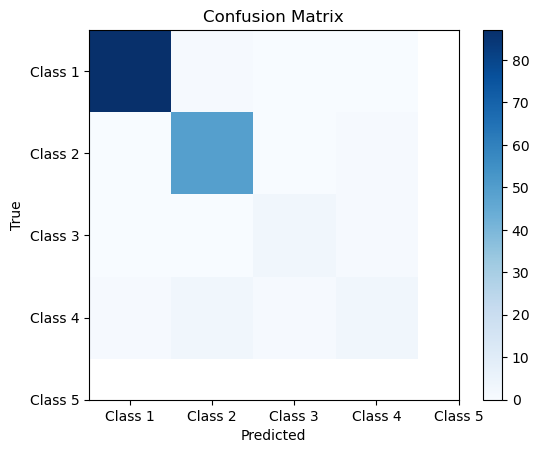

In [43]:
from sklearn.metrics import confusion_matrix

# Calculate the confusion matrix
cm = confusion_matrix(y_test, y_predicted)

# Plot the confusion matrix as a heatmap
plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
plt.colorbar()
plt.xlabel('Predicted')
plt.ylabel('True')
plt.xticks(np.arange(5), ['Class 1', 'Class 2', 'Class 3', 'Class 4', 'Class 5'])
plt.yticks(np.arange(5), ['Class 1', 'Class 2', 'Class 3', 'Class 4', 'Class 5'])
plt.title('Confusion Matrix')
plt.show()

In [ ]:
# Assuming y_predicted has shape (150, 5)
# num_outputs = y_predicted.shape[1] # Number of output values

# Create an empty array to store the inverse transformed values
# y_it_predicted = np.empty_like(y_predicted)

# Apply inverse transformation to each column of y_predicted
# for i in range(num_outputs):
#     y_it_predicted[:, i] = sc.inverse_transform(y_predicted[:, i].reshape(-1, 1)).squeeze()

# y_it_predicted now contains the inverse transformed values


In [ ]:
# y_it_predicted = sc.inverse_transform(y_predicted)
# y_it_predicted = np.empty_like(y_predicted)
# y_it_predicted = sc.inverse_transform(y_predicted.reshape(-1, 1)).squeeze()